Fabio Gustavo Gomes Vaz   RA:00282997


Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

#🎓 Aula 8 - Análise Exploratória dos Dados
16 de setembro de 2021


---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---


Faça o que se pede:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Dado a url `https://openmv.net/file/food-consumption.csv` leia isso em um formato csv e importe o dataset.

Aqui temos uma base sobre o consumo de alimentos na Europa.

In [3]:
url ='https://openmv.net/file/food-consumption.csv'
df = pd.read_csv(url)
df.head()

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5


### 2) Realize a técnica `Binning` para converter todas as colunas de `df` em 'alto' 'médio' ou 'baixo'. Use pontos linearmente espaçados entre o máximo e o mínimo de cada coluna para separar essas categorias. Deixe os elementos faltantes sem modificação.

In [4]:
df_bins = df
for col in df_bins.drop('Country',axis=1):
  bins = np.linspace( min(df[col]), max(df[col]), 4 )
  group_labels = ['baixa', 'média', 'alta']
  df_bins[f'{col}-binned'] = pd.cut( df[col], bins, labels=group_labels,  include_lowest=True)

df_bins

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread,Real coffee-binned,Instant coffee-binned,Tea-binned,Sweetener-binned,Biscuits-binned,Powder soup-binned,Tin soup-binned,Potatoes-binned,Frozen fish-binned,Frozen veggies-binned,Apples-binned,Oranges-binned,Tinned fruit-binned,Jam-binned,Garlic-binned,Butter-binned,Margarine-binned,Olive oil-binned,Yoghurt-binned,Crisp bread-binned
0,Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26,alta,média,alta,média,média,média,baixa,média,média,média,alta,média,média,alta,baixa,alta,alta,alta,média,baixa
1,Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18,alta,baixa,média,baixa,média,baixa,baixa,baixa,baixa,baixa,alta,média,baixa,média,alta,média,baixa,alta,baixa,baixa
2,France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3,alta,média,média,baixa,alta,média,baixa,média,baixa,baixa,alta,alta,média,média,alta,alta,baixa,baixa,alta,baixa
3,Holland,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15,alta,alta,alta,alta,média,alta,média,baixa,baixa,baixa,alta,alta,média,alta,baixa,baixa,alta,baixa,alta,baixa
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5,alta,média,baixa,baixa,alta,baixa,baixa,baixa,baixa,baixa,alta,média,média,média,baixa,alta,alta,alta,baixa,baixa
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,23,85,94,83,20,91,94,94,84,31.0,24,alta,alta,alta,alta,alta,alta,baixa,baixa,média,média,alta,alta,alta,baixa,alta,alta,alta,alta,média,baixa
6,England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28,baixa,alta,alta,média,alta,média,alta,média,baixa,média,alta,média,alta,alta,baixa,alta,alta,média,baixa,baixa
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9,média,baixa,média,baixa,baixa,baixa,baixa,baixa,baixa,baixa,baixa,baixa,baixa,baixa,alta,média,alta,alta,baixa,baixa
8,Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11,média,baixa,média,média,baixa,baixa,baixa,baixa,baixa,baixa,média,baixa,baixa,baixa,média,baixa,média,baixa,baixa,baixa
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,15,79,70,46,61,64,82,48,61,48.0,30,média,alta,alta,alta,baixa,alta,baixa,média,baixa,baixa,alta,média,média,média,alta,alta,baixa,média,alta,baixa


* Volte o `DataFrame` para os valores originais antes de prosseguir para as próximas etapas.

### 3) Use o método `regplot` da biblioteca `Seaborn` para plotar um gráfico de dispersão para duas colunas visando obter a relação entre elas.

* a) Faça isso para as colunas `'Instant coffee'` e `'Powder soup'`. O que você conclui com isso?

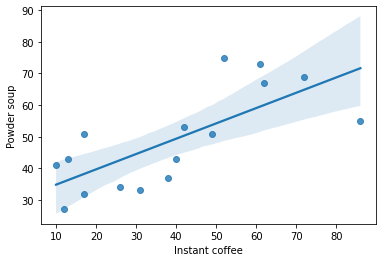

In [5]:
sns.regplot(x = 'Instant coffee', y='Powder soup', data = df)

* b) Faça agora para as colunas `'Real coffee'` e `'Instant coffee'`. O que você conclui com isso?

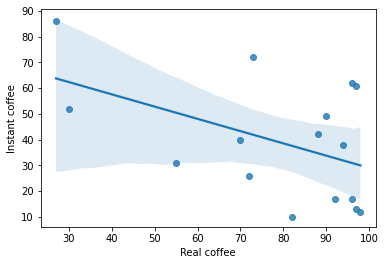

In [6]:
sns.regplot(x= 'Real coffee', y= 'Instant coffee', data=df)

* c) Faça agora para as colunas `'Frozen fish'` e `'Biscuits'`. O que você conclui com isso?

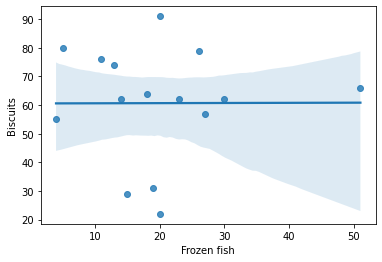

In [7]:
sns.regplot(x = 'Frozen fish',y = 'Biscuits',data =df)

### 4) Use o método `corr()` do Pandas para mostrar a correlação entre os alimentos. Não é necessário remover os dados faltantes ou tratá-los, uma vez que o método irá desconsiderá-los.

In [8]:
df.corr()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
Real coffee,1.000000,-0.475613,-0.118147,0.253647,-0.080474,-0.253914,-0.271326,0.243753,0.397034,0.301570,0.241104,0.557758,-0.102849,-0.355778,0.070866,-0.106659,0.263022,-0.014549,0.305391,0.354042
Instant coffee,-0.475613,1.000000,0.290961,0.242011,0.285791,0.727154,0.508093,-0.022561,-0.291814,-0.064515,0.480764,0.251411,0.694902,0.383235,0.033616,0.154920,0.170071,0.075116,0.530437,-0.405431
Tea,-0.118147,0.290961,1.000000,0.635918,0.205557,0.441225,0.535232,0.158115,0.320735,0.478507,0.133454,0.025367,0.546490,0.538513,-0.593807,0.302403,0.245749,-0.480293,0.002151,0.412792
Sweetener,0.253647,0.242011,0.635918,1.000000,0.196768,0.205844,0.467402,0.314216,0.653018,0.809766,0.409714,0.393163,0.639898,0.375093,-0.467820,-0.029145,0.367872,-0.369453,0.184523,0.460464
Biscuits,-0.080474,0.285791,0.205557,0.196768,1.000000,0.320052,0.562397,0.184761,0.003043,0.259661,0.553422,0.482758,0.672569,0.434042,-0.352398,0.462649,0.111343,-0.137450,0.023834,0.059358
Powder soup,-0.253914,0.727154,0.441225,0.205844,0.320052,1.000000,0.249709,-0.001805,-0.243882,-0.085481,0.480530,0.407399,0.613927,0.366096,0.015203,0.114699,-0.139218,-0.049143,0.450818,-0.190110
Tin soup,-0.271326,0.508093,0.535232,0.467402,0.562397,0.249709,1.000000,0.366561,0.193697,0.477276,0.332235,0.257916,0.741472,0.730316,-0.545127,0.131292,0.203571,-0.190029,0.038804,0.211124
Potatoes,0.243753,-0.022561,0.158115,0.314216,0.184761,-0.001805,0.366561,1.000000,0.624323,0.595322,0.201295,0.366681,0.293642,0.293023,-0.203761,0.090660,-0.156508,-0.072968,0.097868,0.601250
Frozen fish,0.397034,-0.291814,0.320735,0.653018,0.003043,-0.243882,0.193697,0.624323,1.000000,0.905160,0.030005,0.230049,0.269813,0.088306,-0.322249,0.043929,0.207306,-0.111702,-0.258957,0.682232
Frozen veggies,0.301570,-0.064515,0.478507,0.809766,0.259661,-0.085481,0.477276,0.595322,0.905160,1.000000,0.285694,0.312003,0.530707,0.339465,-0.473994,0.186117,0.237666,-0.197097,-0.142898,0.639299


### 5) Como você pode observar, há muita informação na tela. Para melhorar a visualização e também os *insights* use o metodo `heatmap` da biblioteca `Seaborn` para gerar um mapa de calor da matriz de correlação.

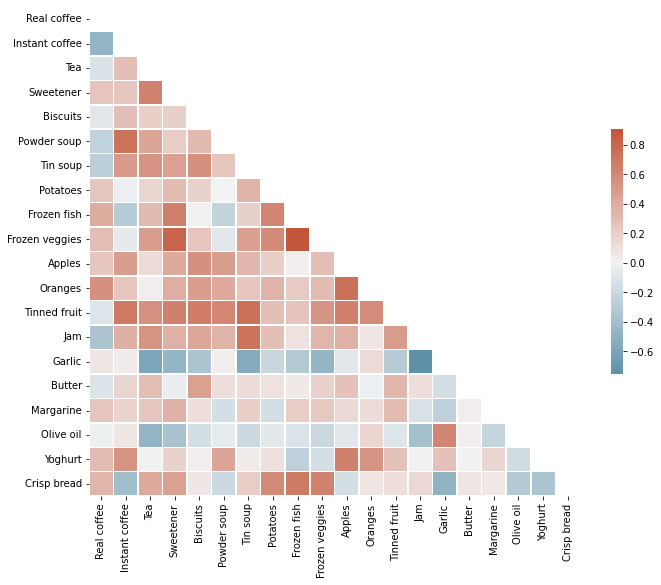

In [15]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})

### 6) Descreva padrões de comportamento baseado no gráfico que você acabou de gerar.

Comente em particular os seguintes pontos:
* Alimentos congelados (Frozen)
* Alimentos enlatados (Tinned)
* Café instantâneo e sopa instantânea


>Os alimentos congelados (Frozen fish e Frozen veggies) têm forte relação 
negativa entre sí, em comparação com os demais aliementos a relação positivas ou negativa é igual para todos os alimentos. 

>Além dos alimentos enlatados terem um relação negativas (Tinned fruit e Tin soup), têm ralação positiva com real coffee e garlic, os alimentos enlatados também têm relação forte negativa com café instantâneo. Em comparação com os demais alimentos a relação positivas ou negativa é igual para todos os alimentos. 

>Café instantâneo e sopa em pó têm relação positiva ou negativa iguais com quase todos alimentos, exceto margarina e óleo de oliva. 




